# Classificação de Churn com Regressão Logística
```
# O que é Churn?
Churn é uma métrica que indica o quanto sua empresa perdeu de receita ou clientes.
```

O dataset utilizado é proveniente de uma empresa fictícia de telefonia, criado e disponibilizado pela IBM para fins didáticos.

O dicionário com as descrições das features pode ser encontrado [neste link no Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).

# 🧩 Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, roc_curve
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
from sklearn import set_config
set_config(display='diagram')

# 🗂️ Data


In [4]:
df = pd.read_excel('https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx', index_col=0)
display(df)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN


# 🛠️ Exploratory Data Analysis (EDA)

In [5]:
# Conferindo se não tem linhas duplicadas
df.duplicated().sum().any()

np.False_

In [6]:
# Conferindo se não tem valores faltantes
df.isna().sum()

Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Inicial Drops

In [7]:
df[df['Churn Reason'].isna()]['Churn Label'].value_counts()

Churn Label
No    5174
Name: count, dtype: int64

In [8]:
# Essas variavéis dizem basicamente a mesma informação
df.filter(like='Churn')

,Churn Label,Churn Value,Churn Score,Churn Reason
CustomerID,,,,
3668-QPYBK,Yes,1,86,Competitor made better offer
9237-HQITU,Yes,1,67,Moved
9305-CDSKC,Yes,1,86,Moved
7892-POOKP,Yes,1,84,Moved
0280-XJGEX,Yes,1,89,Competitor had better devices
...,...,...,...,...
2569-WGERO,No,0,45,NaN
6840-RESVB,No,0,59,NaN
2234-XADUH,No,0,71,NaN


In [9]:
# Drop churn columns -  vamos ignorar algumas colunas
df.drop(columns=['Churn Label', 'Churn Score', 'Churn Reason'], inplace=True)

In [10]:
# Eliminando as colunas que tem apenas uma informação
constant_cols = df.columns[df.nunique()==1] # [Count, Country, State]
df.drop(columns=constant_cols, inplace=True)

In [11]:
# Eliminando algumas colunas que não serão úteis para o modelo
geographic_cols2drop = ['City', 'Zip Code', 'Lat Long']
df.drop(columns=geographic_cols2drop, inplace=True)

In [12]:
df.head(2)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701


## Correcting types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7043 non-null   float64
 1   Longitude          7043 non-null   float64
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract      

In [14]:
# Convertendo Total Charges para float

'''
# Outra forma de fazer a conversão
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
'''

str_idx = df['Total Charges'].map(lambda x: isinstance(x, str))
int_idx = df['Total Charges'].map(lambda x: isinstance(x, int))

df.loc[int_idx, 'Total Charges'] = df.loc[int_idx, 'Total Charges'].astype(float)
df.loc[str_idx, 'Total Charges'] = 0

In [15]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [16]:
df.head(2)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701


In [17]:
# Verificando a conversão dos valores que estamos em str -> 0
df[df['Total Charges']==0]

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,2578
3115-CZMZD,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,0,5504
5709-LVOEQ,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,...,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0,2048
4367-NUYAO,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,0,4950
1371-DWPAZ,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0,4740
7644-OMVMY,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,0,2019
3213-VVOLG,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,0,2299
2520-SGTTA,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,0,3763
2923-ARZLG,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,0,4890


In [18]:
df[df['Total Charges']!=0]

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,5306
6840-RESVB,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,2140
2234-XADUH,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,5560


In [28]:
# Salvando o arquivo
df.to_csv('churn.csv', encoding='utf-8', index=False)

## One-hot encoding of categorical columns & Standardization
Padronização das colunas numéricas e Codificação one-hot das colunas categóricas

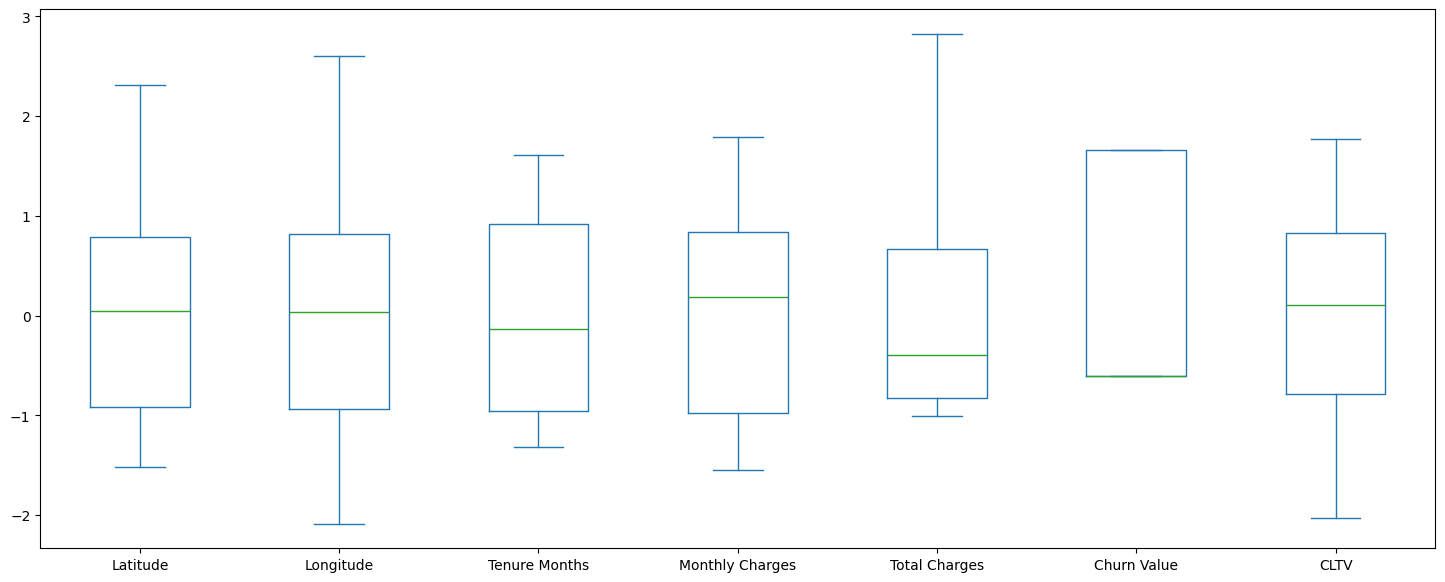

In [ ]:
# Selecionados as variáveis numéricas para verificar sua distribuição
numeric_cols = df.select_dtypes('number').columns
df[numeric_cols].apply(scale).plot.box(figsize=(18,7));

In [ ]:
# Separando o target das features
df_features = df.drop(columns='Churn Value')
target = df['Churn Value']

In [ ]:
# Separando as colunas por tipo
numerical_cols = df_features.select_dtypes('number').columns
categorical_cols = df_features.select_dtypes(exclude='number').columns

In [ ]:
# Padronização das colunas numéricas e codificação one-hot das colunas categóricas
preprocessing = ColumnTransformer([
    ('numerical_preprocessing', StandardScaler(), numerical_cols),
    ('categorical_preprocessing', OneHotEncoder(), categorical_cols)
])

preprocessing.fit(df_features)

ColumnTransformer(transformers=[('numerical_preprocessing', StandardScaler(),
                                 Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')),
                                ('categorical_preprocessing', OneHotEncoder(),
                                 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])

In [ ]:
preprocessing.get_feature_names_out()

array(['numerical_preprocessing__Latitude',
       'numerical_preprocessing__Longitude',
       'numerical_preprocessing__Tenure Months',
       'numerical_preprocessing__Monthly Charges',
       'numerical_preprocessing__Total Charges',
       'numerical_preprocessing__CLTV',
       'categorical_preprocessing__Gender_Female',
       'categorical_preprocessing__Gender_Male',
       'categorical_preprocessing__Senior Citizen_No',
       'categorical_preprocessing__Senior Citizen_Yes',
       'categorical_preprocessing__Partner_No',
       'categorical_preprocessing__Partner_Yes',
       'categorical_preprocessing__Dependents_No',
       'categorical_preprocessing__Dependents_Yes',
       'categorical_preprocessing__Phone Service_No',
       'categorical_preprocessing__Phone Service_Yes',
       'categorical_preprocessing__Multiple Lines_No',
       'categorical_preprocessing__Multiple Lines_No phone service',
       'categorical_preprocessing__Multiple Lines_Yes',
       'categorical_pr

In [ ]:
pd.DataFrame(
    data=preprocessing.transform(df_features),
    columns=preprocessing.get_feature_names_out()
)

,numerical_preprocessing__Latitude,numerical_preprocessing__Longitude,numerical_preprocessing__Tenure Months,numerical_preprocessing__Monthly Charges,numerical_preprocessing__Total Charges,numerical_preprocessing__CLTV,categorical_preprocessing__Gender_Female,categorical_preprocessing__Gender_Male,categorical_preprocessing__Senior Citizen_No,categorical_preprocessing__Senior Citizen_Yes,...,categorical_preprocessing__Streaming Movies_Yes,categorical_preprocessing__Contract_Month-to-month,categorical_preprocessing__Contract_One year,categorical_preprocessing__Contract_Two year,categorical_preprocessing__Paperless Billing_No,categorical_preprocessing__Paperless Billing_Yes,categorical_preprocessing__Payment Method_Bank transfer (automatic),categorical_preprocessing__Payment Method_Credit card (automatic),categorical_preprocessing__Payment Method_Electronic check,categorical_preprocessing__Payment Method_Mailed check
0,-0.944111,0.707268,-1.236724,-0.362660,-0.958066,-0.981675,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.905362,0.691215,-1.236724,0.197365,-0.938874,-1.436462,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.909951,0.697457,-0.992402,1.159546,-0.643789,0.821409,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.904204,0.687374,-0.177995,1.330711,0.338085,0.509483,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.913530,0.710276,0.677133,1.294151,1.216150,0.794358,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.790334,1.510595,1.613701,-1.449476,-0.379565,0.765617,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7039,-0.657542,1.048644,-0.340876,0.665992,-0.127605,-1.910691,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7040,-0.701497,1.928742,1.613701,1.277533,2.242606,0.980330,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,-0.861169,1.360014,-0.870241,-1.168632,-0.852932,-1.358692,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_mi = df.copy()

encoder = OrdinalEncoder()
df_mi[categorical_cols] = encoder.fit_transform(df_mi[categorical_cols]).astype(int)
df_mi.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,1,0,0,0,2,1,0,0,...,0,0,0,0,1,3,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,0,0,0,1,2,1,0,1,...,0,0,0,0,1,2,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,0,0,0,1,8,1,2,1,...,0,2,2,0,1,2,99.65,820.50,1,5372
7892-POOKP,34.062125,-118.315709,0,0,1,1,28,1,2,1,...,2,2,2,0,1,2,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,1,0,0,1,49,1,2,1,...,0,2,2,0,1,0,103.70,5036.30,1,5340


# 📝 Data Insights

In [ ]:
# Configuração do estilo
sns.set_style("whitegrid")

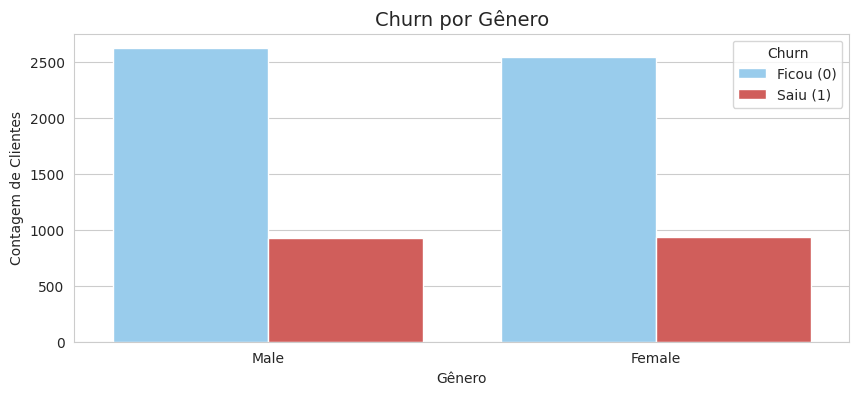

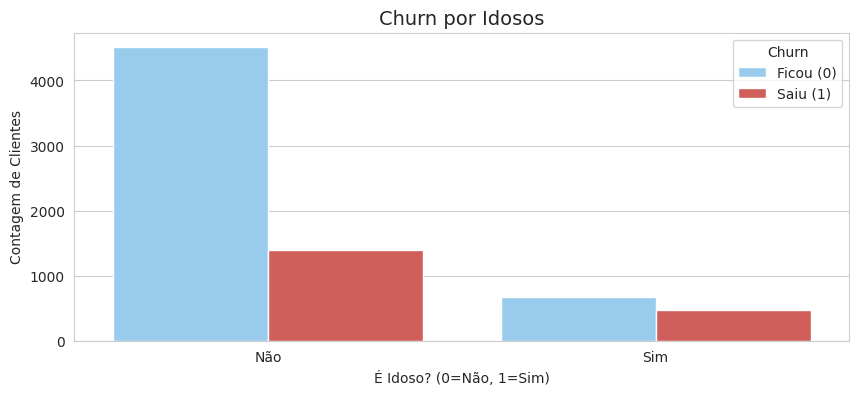

In [ ]:
''' Perfil Demográfico e Churn: Gênero e Senior Citizen têm impacto no churn?'''

# --- Gênero
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Gender", hue="Churn Value", palette={0: "#8BCFFA", 1: "#E34B48"})
plt.title("Churn por Gênero", fontsize=14)
plt.xlabel("Gênero")
plt.ylabel("Contagem de Clientes")
plt.legend(title="Churn", labels=["Ficou (0)", "Saiu (1)"])
plt.show()

# --- Senior Citizen
plt.figure(figsize=(10, 4))
sns.countplot(data=df_mi, x="Senior Citizen", hue="Churn Value", palette={0: "#8BCFFA", 1: "#E34B48"})
plt.title("Churn por Idosos", fontsize=14)
plt.xlabel("É Idoso? (0=Não, 1=Sim)")
plt.ylabel("Contagem de Clientes")
plt.xticks([0, 1], ["Não", "Sim"])
plt.legend(title="Churn", labels=["Ficou (0)", "Saiu (1)"])
plt.show()

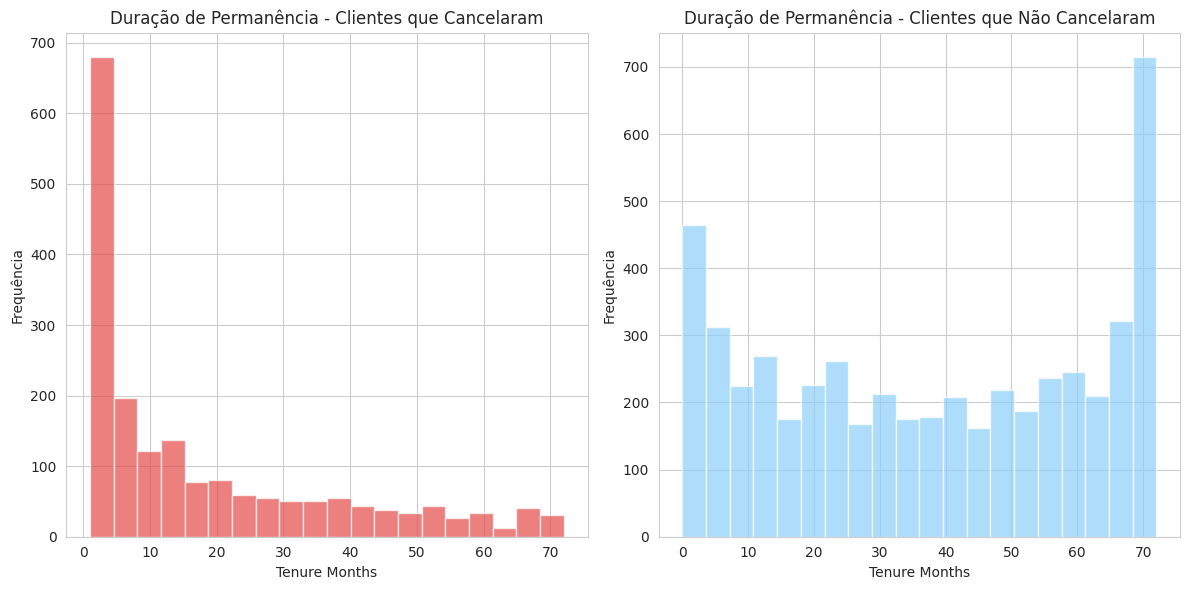

In [ ]:
''' Clientes com menos tempo de permanência têm maior chance de churn?
Qual é a relação entre a duração de permanência (Tenure Months) e o valor de churn (Churn Value)? '''

plt.figure(figsize=(12, 6))

# Histograma para clientes que cancelaram (churn = 1)
plt.subplot(1, 2, 1)
df_mi[df_mi['Churn Value'] == 1]['Tenure Months'].hist(bins=20, color='#E34B48', alpha=0.7)
plt.title('Duração de Permanência - Clientes que Cancelaram')
plt.xlabel('Tenure Months')
plt.ylabel('Frequência')

# Histograma para clientes que não cancelaram (churn = 0)
plt.subplot(1, 2, 2)
df_mi[df_mi['Churn Value'] == 0]['Tenure Months'].hist(bins=20, color='#8BCFFA', alpha=0.7)
plt.title('Duração de Permanência - Clientes que Não Cancelaram')
plt.xlabel('Tenure Months')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

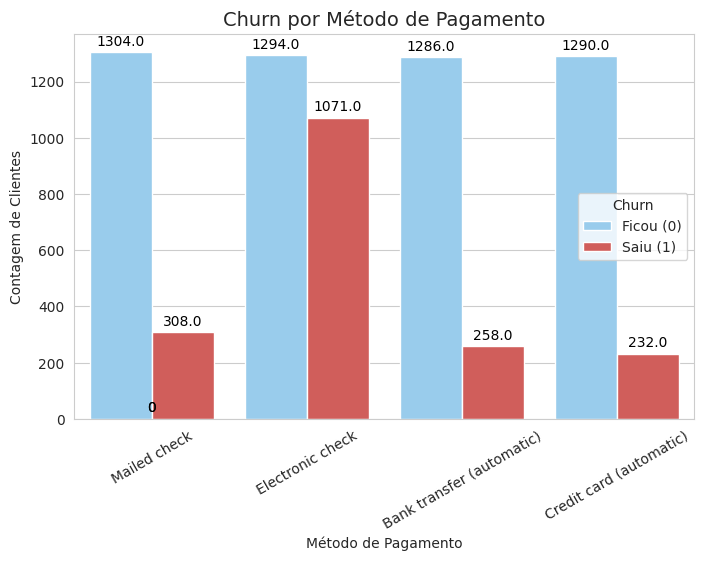

In [ ]:
'''Como o método de pagamento influencia a taxa de churn?'''

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Payment Method", hue="Churn Value", palette={0: "#8BCFFA", 1: "#E34B48"})
plt.title("Churn por Método de Pagamento", fontsize=14)
plt.xlabel("Método de Pagamento")
plt.ylabel("Contagem de Clientes")
plt.legend(title="Churn", labels=["Ficou (0)", "Saiu (1)"])
plt.xticks(rotation=30)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

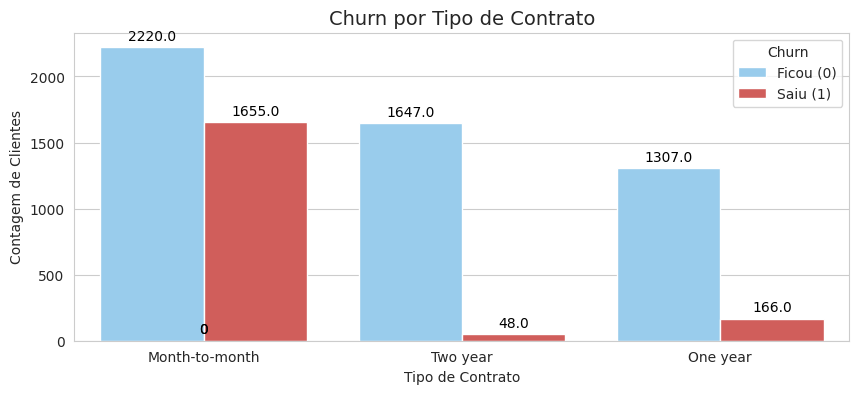

In [ ]:
'''
# O Tipo de Contrato influenciam o churn?

'''

plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x="Contract", hue="Churn Value", palette={0: "#8BCFFA", 1: "#E34B48"})
plt.title("Churn por Tipo de Contrato", fontsize=14)
plt.xlabel("Tipo de Contrato")
plt.ylabel("Contagem de Clientes")
plt.legend(title="Churn", labels=["Ficou (0)", "Saiu (1)"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

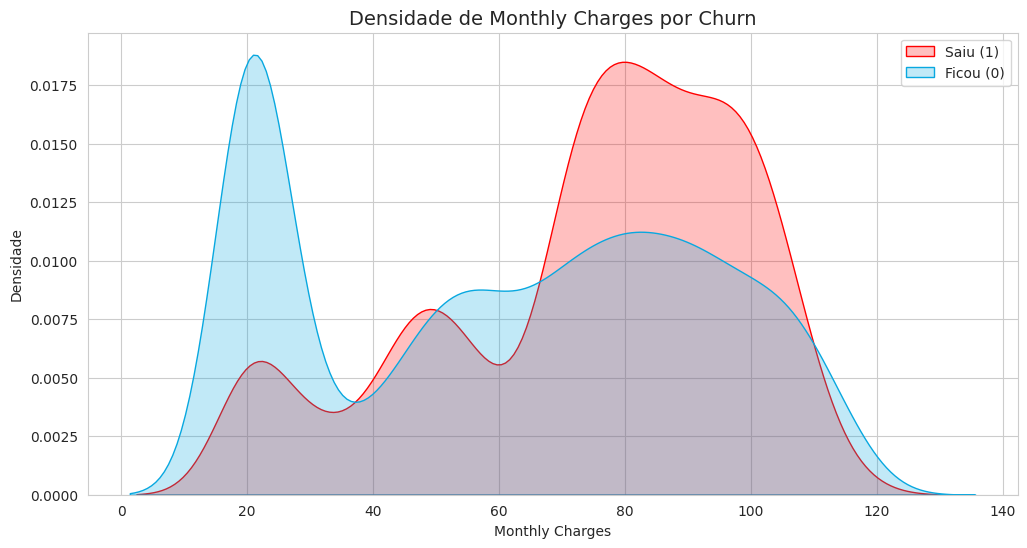

In [ ]:
'''Clientes com cobranças mais altas têm maior churn?'''

plt.figure(figsize=(12, 6))
sns.kdeplot(df[df["Churn Value"] == 1]["Monthly Charges"], fill=True, color="red", label="Saiu (1)")
sns.kdeplot(df[df["Churn Value"] == 0]["Monthly Charges"], fill=True, color="#08A8E0", label="Ficou (0)")
plt.title("Densidade de Monthly Charges por Churn", fontsize=14)
plt.xlabel("Monthly Charges")
plt.ylabel("Densidade")
plt.legend()
plt.show()

# 🤖 Model Building

In [ ]:
df_features = df_mi.drop(columns='Churn Value')
target = df_mi['Churn Value']

In [ ]:
df_features.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,1,0,0,0,2,1,0,0,...,0,0,0,0,0,1,3,53.85,108.15,3239
9237-HQITU,34.059281,-118.307420,0,0,0,1,2,1,0,1,...,0,0,0,0,0,1,2,70.70,151.65,2701
9305-CDSKC,34.048013,-118.293953,0,0,0,1,8,1,2,1,...,2,0,2,2,0,1,2,99.65,820.50,5372
7892-POOKP,34.062125,-118.315709,0,0,1,1,28,1,2,1,...,2,2,2,2,0,1,2,104.80,3046.05,5003
0280-XJGEX,34.039224,-118.266293,1,0,0,1,49,1,2,1,...,2,0,2,2,0,1,0,103.70,5036.30,5340


### Mutual Information

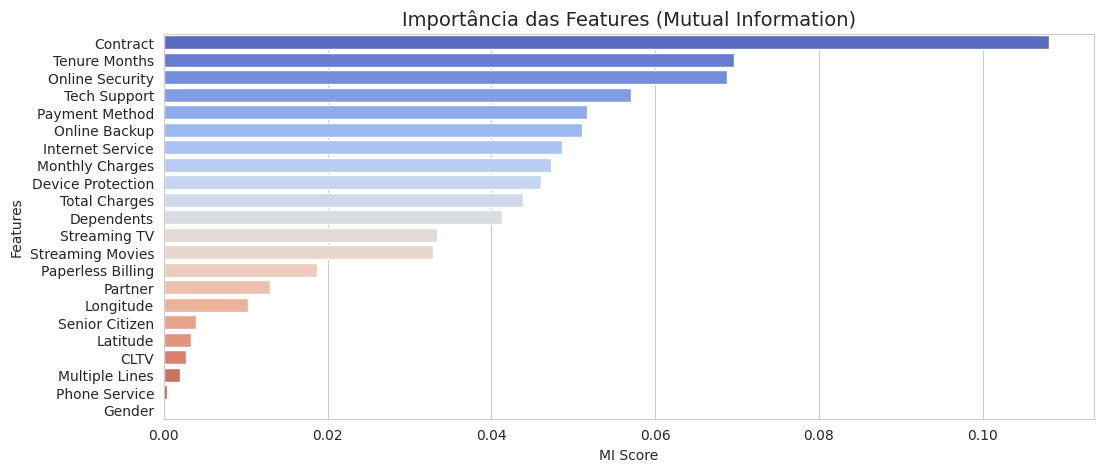

In [ ]:
mi_scores = mutual_info_classif(df_features, target, discrete_features='auto')
mi_scores = pd.Series(mi_scores, index=df_features.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=mi_scores.values, y=mi_scores.index, palette="coolwarm", hue=mi_scores.index, legend=False)
plt.title("Importância das Features (Mutual Information)", fontsize=14)
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.show()

In [ ]:
selected_features = mi_scores[mi_scores > 0.02].index
df_features = df_features[selected_features]
df_features.head()

,Contract,Tenure Months,Online Security,Tech Support,Payment Method,Online Backup,Internet Service,Monthly Charges,Device Protection,Total Charges,Dependents,Streaming TV,Streaming Movies
CustomerID,,,,,,,,,,,,,
3668-QPYBK,0,2,2,0,3,2,0,53.85,0,108.15,0,0,0
9237-HQITU,0,2,0,0,2,0,1,70.70,0,151.65,1,0,0
9305-CDSKC,0,8,0,0,2,0,1,99.65,2,820.50,1,2,2
7892-POOKP,0,28,0,2,2,0,1,104.80,2,3046.05,1,2,2
0280-XJGEX,0,49,0,0,0,2,1,103.70,2,5036.30,1,2,2


<Figure size 1000x500 with 0 Axes>

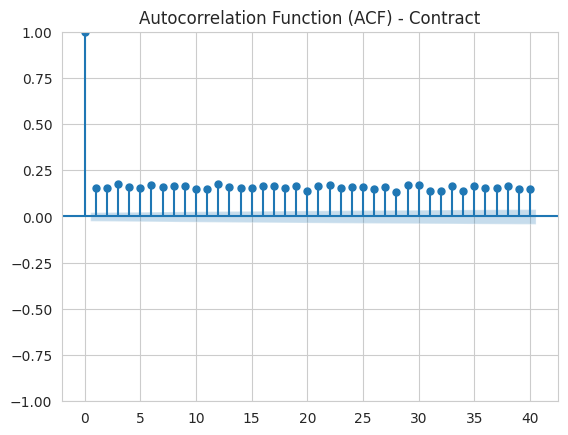

<Figure size 1000x500 with 0 Axes>

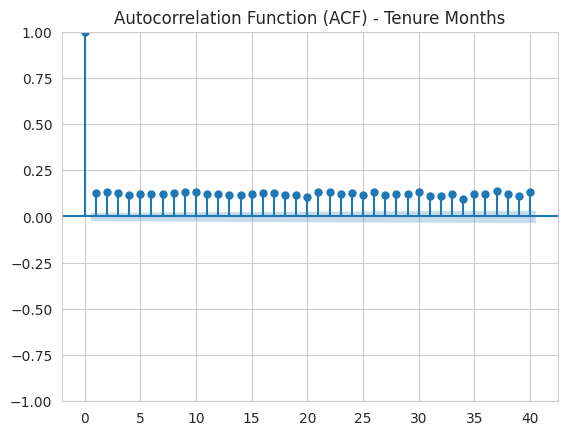

<Figure size 1000x500 with 0 Axes>

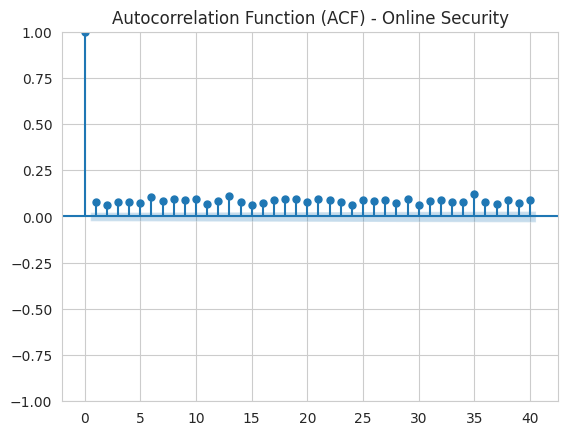

<Figure size 1000x500 with 0 Axes>

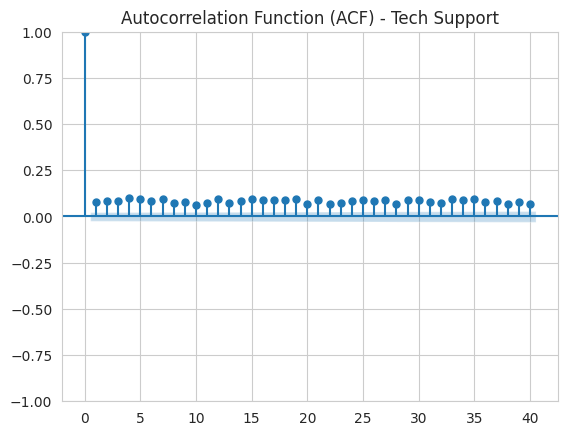

<Figure size 1000x500 with 0 Axes>

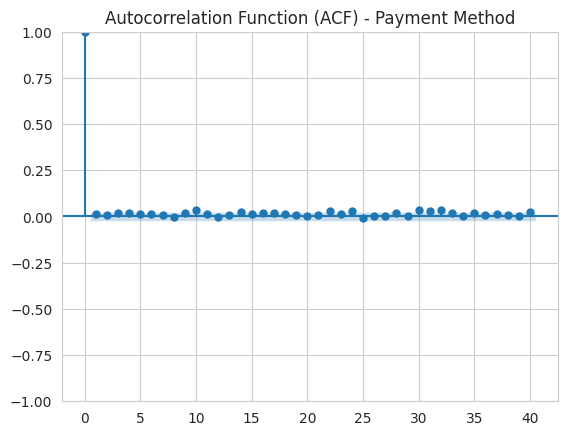

<Figure size 1000x500 with 0 Axes>

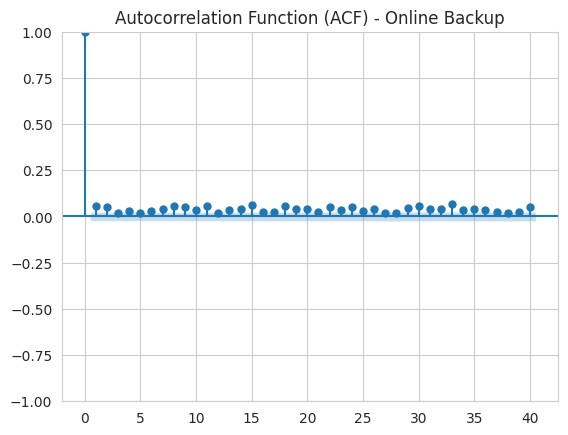

<Figure size 1000x500 with 0 Axes>

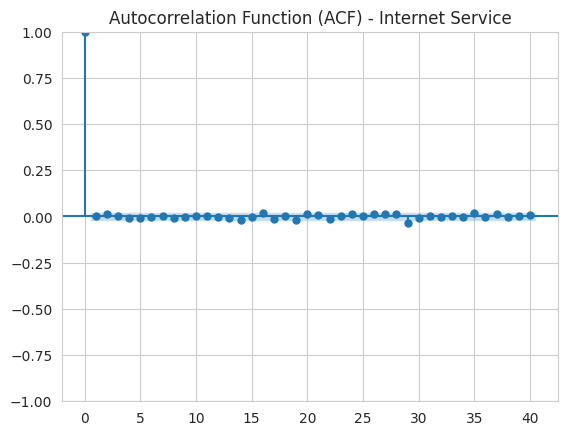

<Figure size 1000x500 with 0 Axes>

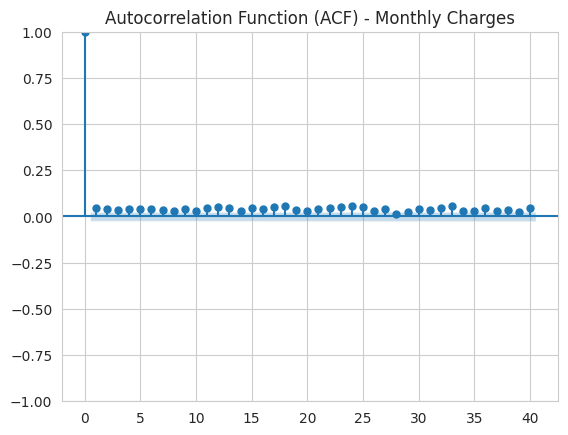

<Figure size 1000x500 with 0 Axes>

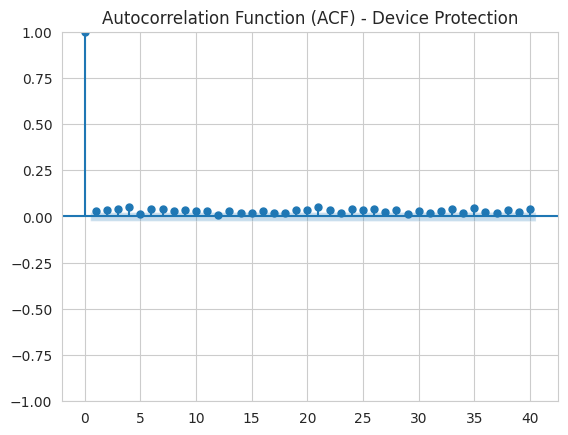

<Figure size 1000x500 with 0 Axes>

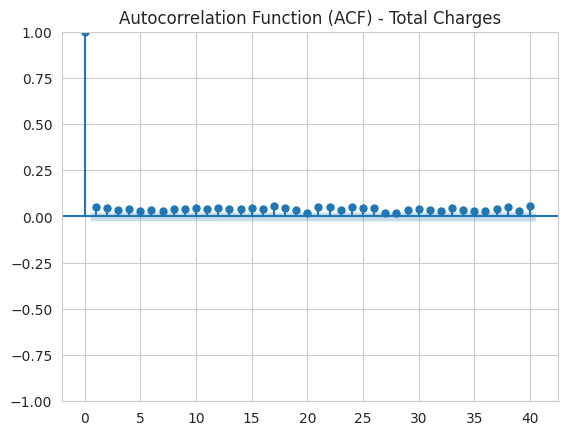

<Figure size 1000x500 with 0 Axes>

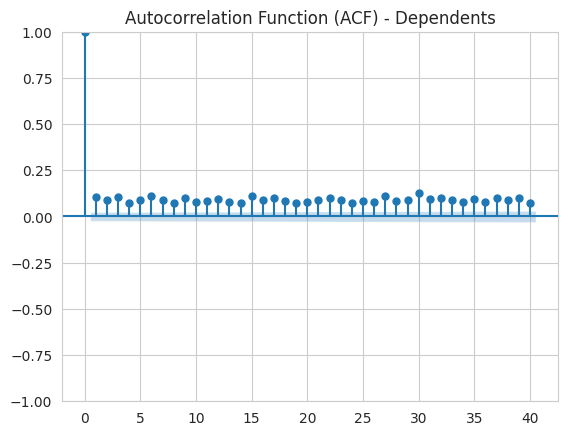

<Figure size 1000x500 with 0 Axes>

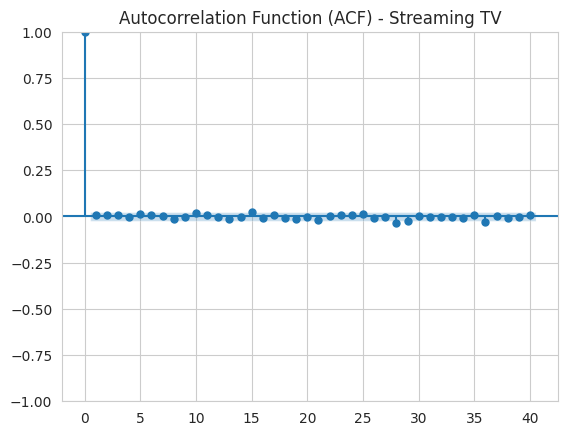

<Figure size 1000x500 with 0 Axes>

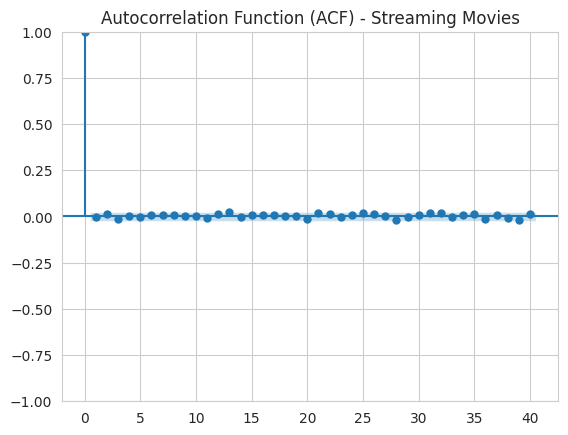

In [ ]:
for col in df_features.columns:
    if df_features[col].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10,5))
        plot_acf(df_features[col].dropna(), lags=40)
        plt.title(f'Autocorrelation Function (ACF) - {col}')
        plt.show()

## Correlation matrix

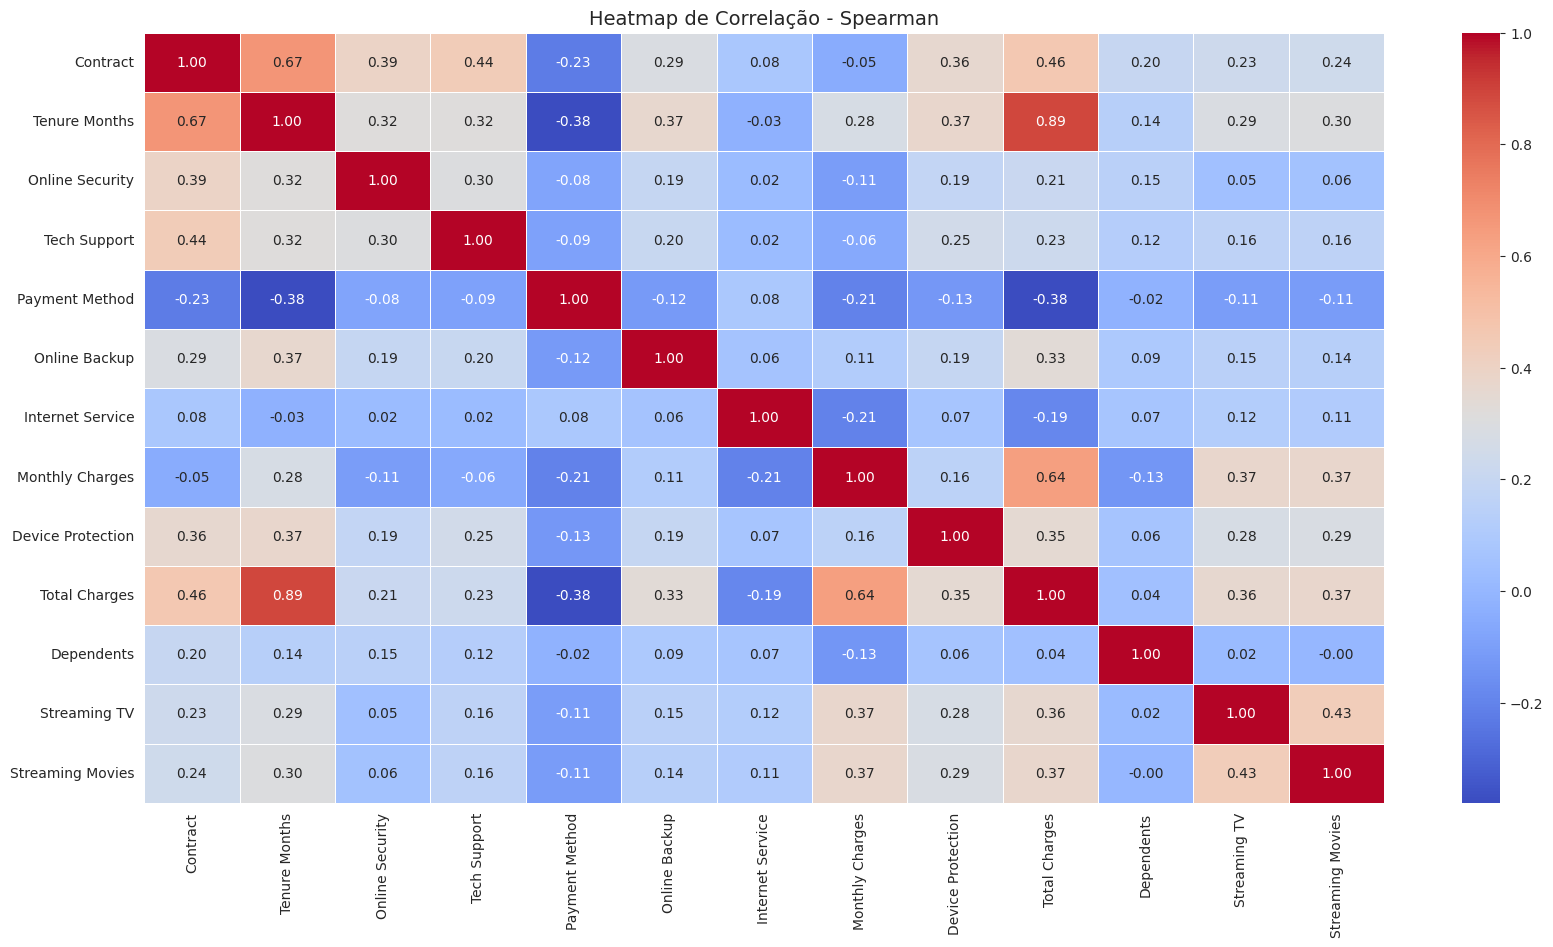

In [ ]:
plt.figure(figsize = (20,10))
correlation = df_features.corr(method='spearman')
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação - Spearman", fontsize=14)
plt.show()

Pelo mapa de correlação, percebemos que:

> Tenure Months e Total Charges = 0.89


Para evitar a instabilidade dos coeficientes e a dificuldade de interpretação, vamos excluí-las do nosso modelo, evitando assim a multicolinearidade.

In [ ]:
df_features.drop(columns=['Total Charges'], inplace=True)

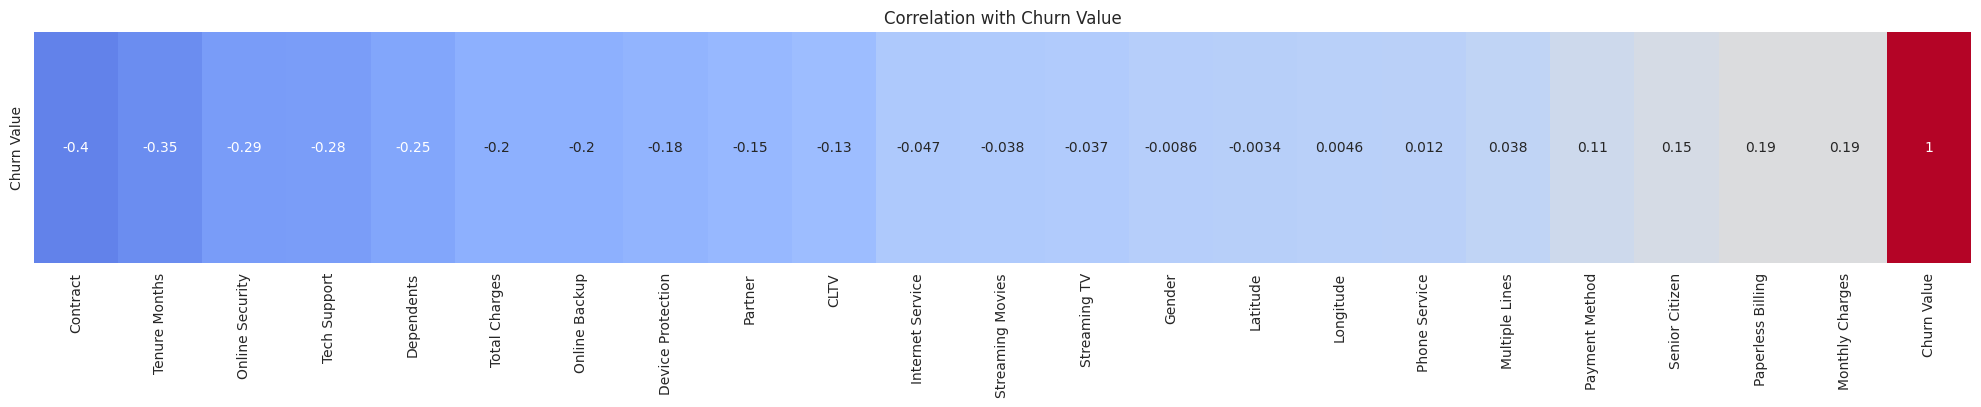

In [ ]:
corr_matrix = df_mi.corr()

# Extract the row corresponding to 'Target_Column'
target_corr = corr_matrix.loc[['Churn Value']]
sorted_columns = target_corr.columns[target_corr.values.argsort()[0]]
target_corr = target_corr[sorted_columns]


plt.figure(figsize=(25, 3))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', cbar=False,  vmin=-.6, vmax=1)
plt.title("Correlation with Churn Value")
plt.show()

## Train & Test

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_features, target, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")

X_train: 4930
X_test: 2113


In [ ]:
# Treinando o modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Training results

In [ ]:
y_train_pred = log_reg.predict_proba(X_train)[:, 1]

result_train = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob': y_train_pred})
result_train['CustomerID'] = y_train.index
result_train['Predicted'] = result_train.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)  # Se Churn_Prob > 0.5, Churn = 1, caso contrário 0
result_train.head()

,Churn,Churn_Prob,CustomerID,Predicted
0,1,0.778956,9124-LHCJQ,1
1,0,0.059122,1470-PSXNM,0
2,0,0.126406,9128-CPXKI,0
3,1,0.202852,2235-ZGKPT,0
4,0,0.008041,8510-TMWYB,0


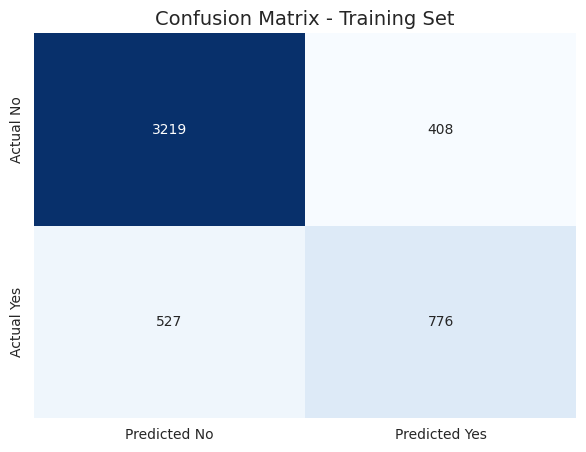

In [ ]:
# Calculando a matriz de confusão para o conjunto de treino
cm_train = confusion_matrix(result_train.Churn, result_train.Predicted)

plt.figure(figsize=(7,5))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"], cbar=False)
plt.title('Confusion Matrix - Training Set', fontsize=14)
plt.show()

In [ ]:
# Acurácia no conjunto de treino
accuracy = accuracy_score(result_train['Churn'], result_train['Predicted'])
print(f"Acurácia (Treinamento): {accuracy:.3f}")

# Precisão no conjunto de treino
precision = precision_score(result_train['Churn'], result_train['Predicted'])
print(f"Precisão (Treinamento): {precision:.3f}")

Acurácia (Treinamento): 0.810
Precisão (Treinamento): 0.655


# 🚩 Test results

In [ ]:
# Fazendo a predição no conjunto de teste
y_test_pred = log_reg.predict_proba(X_test)[:, 1]

result_test = pd.DataFrame({'Churn': y_test.values, 'Churn_Prob': y_test_pred})
result_test['CustomerID'] = y_test.index
result_test['Predicted'] = result_test.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

result_test.head()

,Churn,Churn_Prob,CustomerID,Predicted
0,0,0.383743,8263-OKETD,0
1,1,0.085358,7136-RVDTZ,0
2,1,0.536104,6413-XKKPU,1
3,0,0.790111,3338-CVVEH,1
4,0,0.426564,0916-QOFDP,0


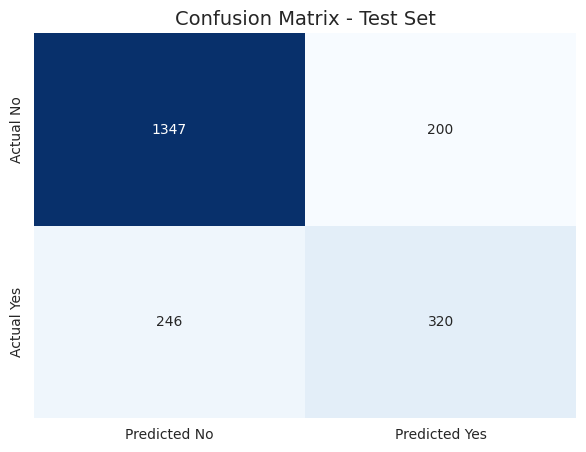

In [ ]:
# Calculando a matriz de confusão para o conjunto de teste
cm_test = confusion_matrix(result_test.Churn, result_test.Predicted)

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"], cbar=False)
plt.title('Confusion Matrix - Test Set', fontsize=14)
plt.show()

**Classe 0** (negativo): previu corretamente em 1348 casos
                    previu incorretamente em 247 casos


**Classe 1** (positivo): previu corretamente 319 casos
                    previu incorretamente em 199 casos

In [ ]:
# Acurácia no conjunto de teste
accuracy_test = accuracy_score(result_test['Churn'], result_test['Predicted'])
print(f"Acurácia (Teste): {accuracy_test:.3f}")

# Precisão no conjunto de teste
precision_test = precision_score(result_test['Churn'], result_test['Predicted'])
print(f"Precisão (Teste): {precision_test:.3f}")

Acurácia (Teste): 0.789
Precisão (Teste): 0.615


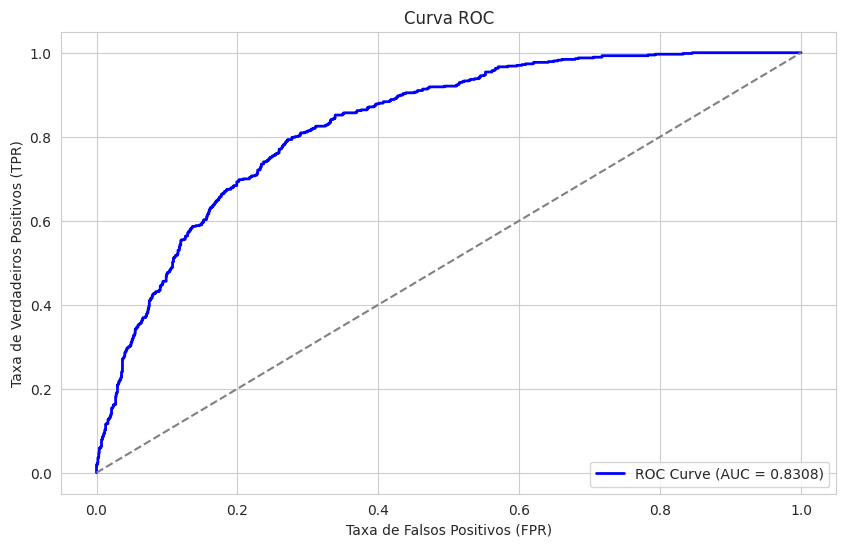

In [ ]:
# Calculando a curva ROC
auc_score = roc_auc_score(result_test.Churn, result_test.Churn_Prob)
fpr, tpr, thresholds = roc_curve(result_test.Churn, result_test.Churn_Prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()